# Practical 7: Linear Regression using NumPy

In [17]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

X values: [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
Y values: [ 5.49671415  5.91436728  7.7529517   9.68092459  8.97637294 10.02902094
 12.89500229 13.13585578 12.95157825 15.01624425 15.0628981  16.11321761
 17.87354122 16.77093028 18.01192427 20.22718615 20.82927414 23.20898417
 23.03934435 23.5876963 ]


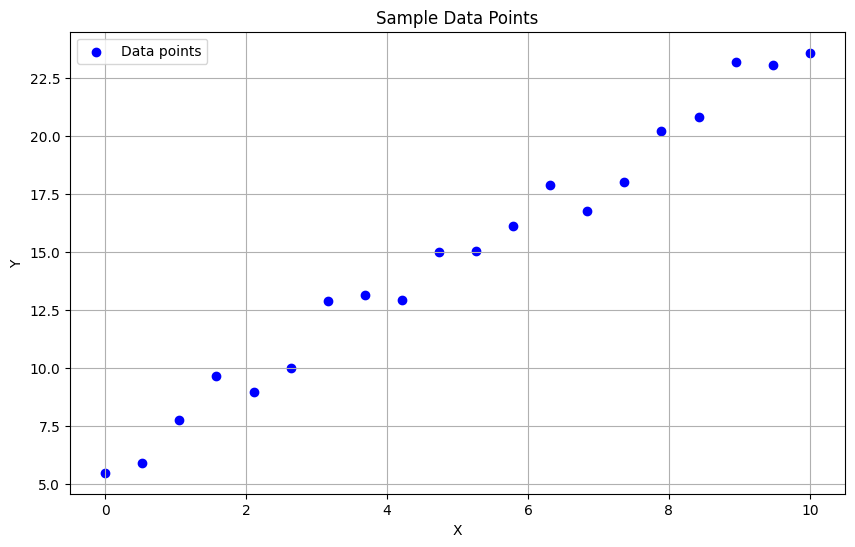

In [18]:
# Create sample data
np.random.seed(42)  # For reproducibility

# Generate X data points (input features)
x = np.linspace(0, 10, 20)

# Generate Y data points with some noise (target values)
y = 2 * x + 5 + np.random.normal(0, 1, 20)

# Display the data
print('X values:', x)
print('Y values:', y)

# Visualize the data points
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.title('Sample Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
# Compute linear regression coefficients
def compute_linear_regression(x, y):
    # Calculate means
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Calculate the numerator and denominator for beta_1
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sum((x - mean_x) ** 2)
    
    # Calculate beta_1 (slope)
    beta_1 = numerator / denominator
    
    # Calculate beta_0 (intercept)
    beta_0 = mean_y - beta_1 * mean_x
    
    return beta_0, beta_1

# Calculate regression coefficients
beta_0, beta_1 = compute_linear_regression(x, y)

print(f'Intercept (β₀): {beta_0:.4f}')
print(f'Slope (β₁): {beta_1:.4f}')
print(f'Regression equation: y = {beta_0:.4f} + {beta_1:.4f}x')

Intercept (β₀): 5.7746
Slope (β₁): 1.8108
Regression equation: y = 5.7746 + 1.8108x


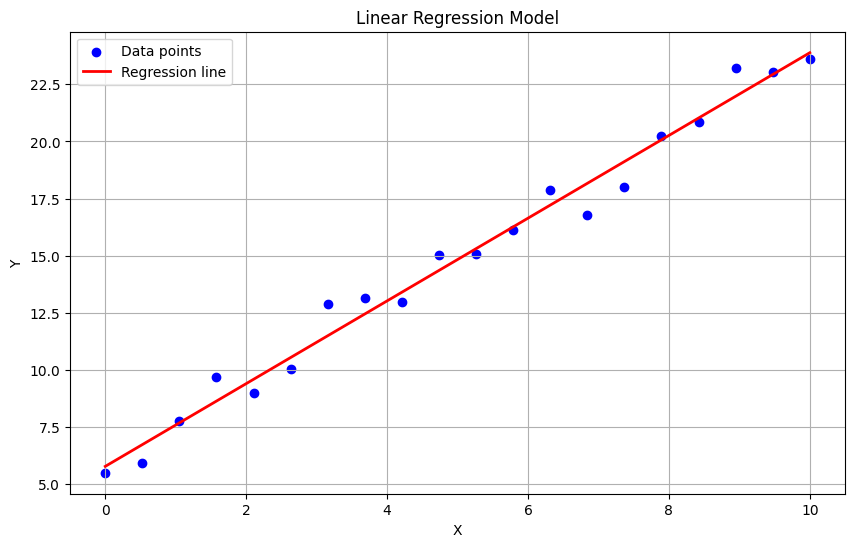

In [20]:
# Predict y values using the linear model
y_pred = beta_0 + beta_1 * x

# Plot the original data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
# Predict for new values of x
new_x_values = np.array([12, 15, 18])
predicted_y = beta_0 + beta_1 * new_x_values

print('Predictions for new x values:')
for x_val, y_pred in zip(new_x_values, predicted_y):
    print(f'x = {x_val}, Predicted y = {y_pred:.4f}')

Predictions for new x values:
x = 12, Predicted y = 27.5045
x = 15, Predicted y = 32.9370
x = 18, Predicted y = 38.3695


In [22]:
# Calculate residuals (errors)
residuals = y - y_pred

# Calculate RSS (Residual Sum of Squares)
rss = np.sum(residuals ** 2)

# Calculate MSE (Mean Squared Error)
mse = np.mean(residuals ** 2)

print(f'Residual Sum of Squares (RSS): {rss:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

Residual Sum of Squares (RSS): 11698.3016
Mean Squared Error (MSE): 584.9151


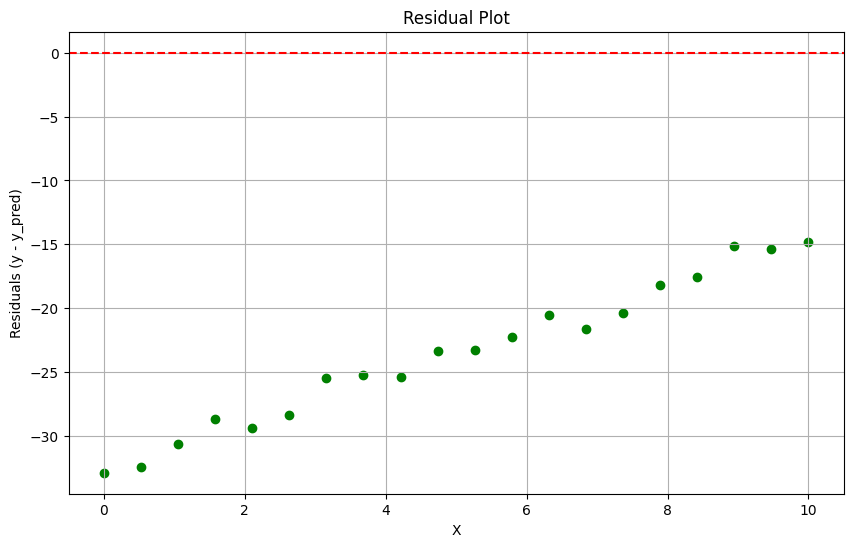

In [23]:
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(x, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('X')
plt.ylabel('Residuals (y - y_pred)')
plt.grid(True)
plt.show()

In [24]:
# Using NumPy's polyfit function for linear regression
# The parameter '1' indicates a polynomial of degree 1 (linear)
poly_coeffs = np.polyfit(x, y, 1)

# poly_coeffs[0] is the slope and poly_coeffs[1] is the intercept
slope = poly_coeffs[0]
intercept = poly_coeffs[1]

print(f'NumPy polyfit - Intercept: {intercept:.4f}')
print(f'NumPy polyfit - Slope: {slope:.4f}')

# Compare with our manual calculation
print('\nComparison with our manual calculation:')
print(f'Manual - Intercept (β₀): {beta_0:.4f}')
print(f'Manual - Slope (β₁): {beta_1:.4f}')

NumPy polyfit - Intercept: 5.7746
NumPy polyfit - Slope: 1.8108

Comparison with our manual calculation:
Manual - Intercept (β₀): 5.7746
Manual - Slope (β₁): 1.8108
